Tasks:
1) Feature Ranking experiments
2) Data validation across different datasets

note: R014 is L1 instr cache access

In [1]:
from explore import ExploreTuningResults as etr
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_regression, mutual_info_regression, SequentialFeatureSelector
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from pandas import Series
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
result_json = "1-11allvictims.json"
result_json2 = "new_data.json"

result_json3 = "1-11cache.json"
experiment = "mem_victim"
experiment2 = "bus_victim"
experiment3 = "pipeline_victim"
experiment4 = "L1_victim"
experiment5 = "cache_enemy0"

data_explorer = etr(result_json)
data_explorer2 = etr(result_json2)

mem_victim = data_explorer.build_dataframe(experiment)
bus_victim = data_explorer.build_dataframe(experiment2)
pipeline_victim = data_explorer.build_dataframe(experiment3)
L1_victim = data_explorer.build_dataframe(experiment4)

L2_victim = data_explorer2.build_dataframe(experiment5)




Get results for 4 tuning configs.
Get results for 1 tuning configs.


In [17]:
result_json = "05-11L1cachepi3.json"
result_json2 = "04-11L2cachepi3.json"
experiment = "L1_victim"
experiment2 = "L2_victim"

data_explorer = etr(result_json)
data_explorer2 = etr(result_json2)

L1_victim = data_explorer.build_dataframe(experiment)
L2_victim = data_explorer2.build_dataframe(experiment2)





Get results for 1 tuning configs.
Get results for 1 tuning configs.


In [21]:
mem_victim = mem_victim.drop(["Template:"], axis=1)
bus_victim = bus_victim.drop(["Template:"], axis=1)
pipeline_victim = pipeline_victim.drop(["Template:"], axis=1)
L1_victim = L1_victim.drop(["Template:"], axis=1)
L2_victim = L2_victim.drop(["Template:"], axis=1)

In [ ]:
df=L1_victim
df=df.drop(["voluntary_switches"], axis=1)

In [24]:
df.describe()


,measurements,temps,invluntary_switches,SIZE,STRIDE,INSTR1,INSTR2,INSTR3,INSTR4,INSTR5
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,411122.076842,68.814331,180.701053,57784.410526,94.410526,1.978947,1.821053,1.526316,2.336842,1.905263
std,268627.308134,2.587963,152.856774,3371.604989,16.462570,0.906113,0.794650,0.723372,0.573425,0.859524
min,19754.000000,55.844000,2.000000,53943.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,36385.750000,66.604000,22.000000,54813.000000,82.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,476234.000000,69.832000,164.000000,57666.000000,89.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,616015.500000,70.908000,297.250000,58921.000000,108.000000,3.000000,2.000000,2.000000,3.000000,3.000000
max,994450.000000,71.984000,623.000000,64549.000000,126.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [25]:
slowdown = df.measurements.max()/df.measurements.min()
print(slowdown)

50.34170294623873


<AxesSubplot:xlabel='measurements', ylabel='Count'>

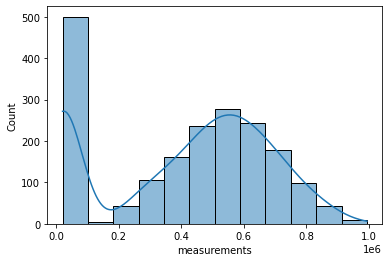

In [23]:

sns.histplot(data=df, x="measurements",kde = True)


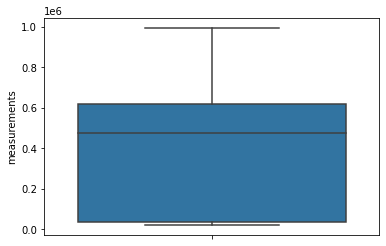

In [12]:
fig = sns.boxplot(data=df, y="measurements")

Skewness: -0.296275
Kurtosis: -1.167189


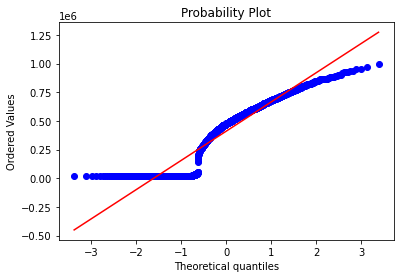

In [13]:
stats.probplot(df['measurements'], plot=plt)
print("Skewness: %f" % df["measurements"].skew())
print("Kurtosis: %f" % df["measurements"].kurt())

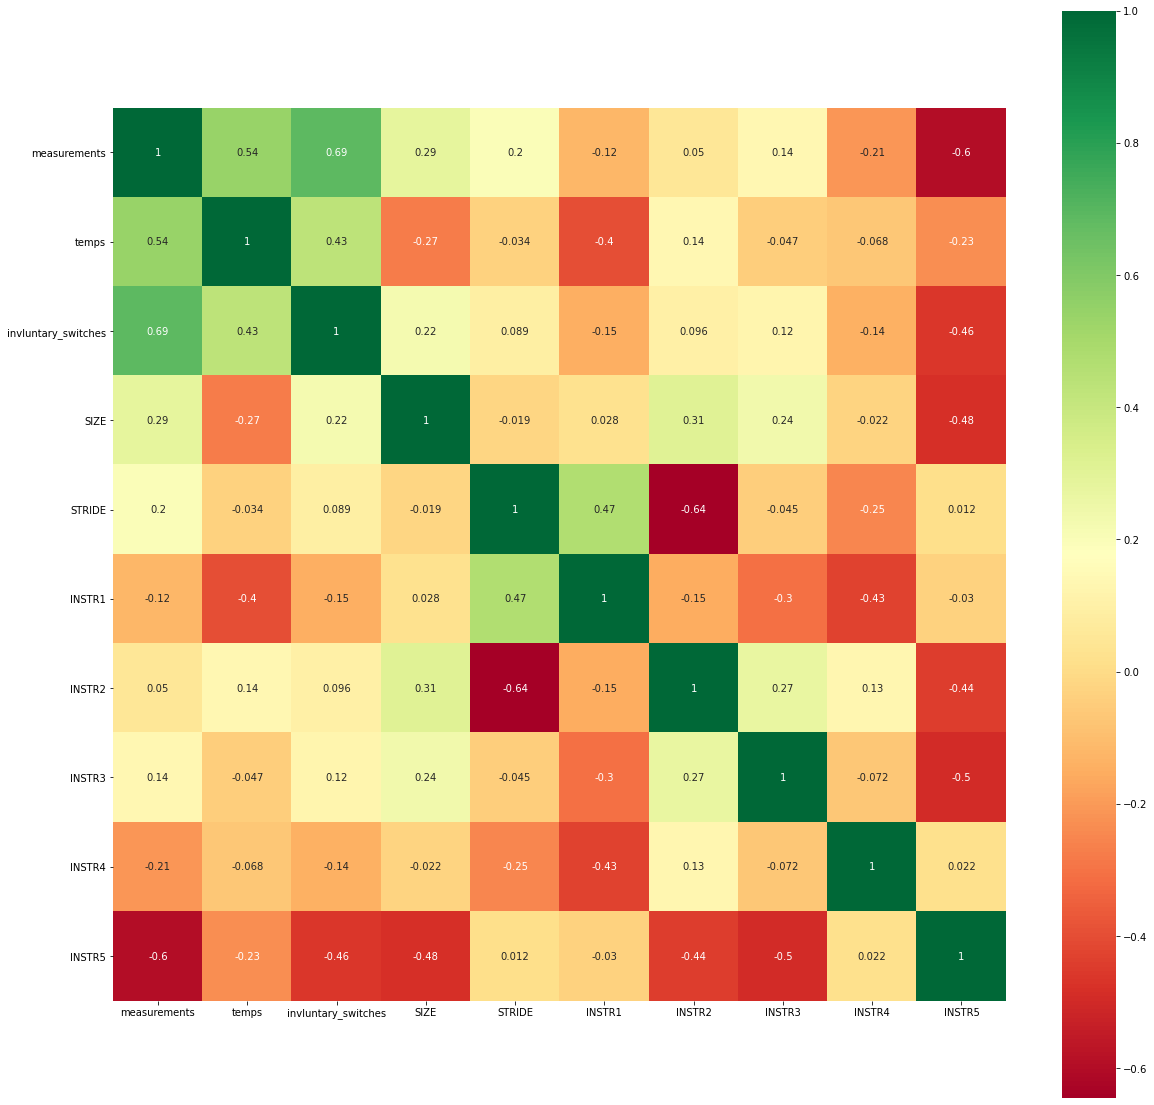

In [26]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap


In [11]:
cor = df.corr()
cor_target = abs(cor["measurements"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.001]
cor_target

measurements           1.000000
temps                  0.151469
invluntary_switches    0.882408
SIZE                   0.217681
STRIDE                 0.063582
INSTR1                 0.374077
INSTR2                 0.419684
INSTR3                 0.077775
INSTR4                 0.046922
INSTR5                 0.315332
cpu-cycles             0.884525
instructions           0.520149
branch-instructions    0.579092
r014                   0.298392
LLC-loads              0.866983
LLC-stores             0.766870
LLC-load-misses        0.028412
LLC-store-misses       0.553919
bus_access             0.715463
mem_access             0.465752
Name: measurements, dtype: float64

In [12]:
cor = db.corr()
cor_target = abs(cor["measurements"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.001]
cor_target

NameError: name 'db' is not defined

In [11]:
pipeline_victim.columns

Index(['measurements', 'temps', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'INSTR1', 'INSTR2', 'INSTR3', 'cpu-cycles', 'instructions',
       'branch-instructions', 'r014', 'LLC-loads', 'LLC-stores',
       'LLC-load-misses', 'LLC-store-misses', 'bus_access', 'mem_access'],
      dtype='object')

In [12]:
keep = ['measurements', 'cpu-cycles', 'instructions',
       'branch-instructions', 'r014', 'LLC-loads', 'LLC-stores',
       'LLC-load-misses', 'LLC-store-misses', 'bus_access', 'mem_access']
db = df[keep]


KeyError: "['r014'] not in index"

<Figure size 1440x1440 with 0 Axes>

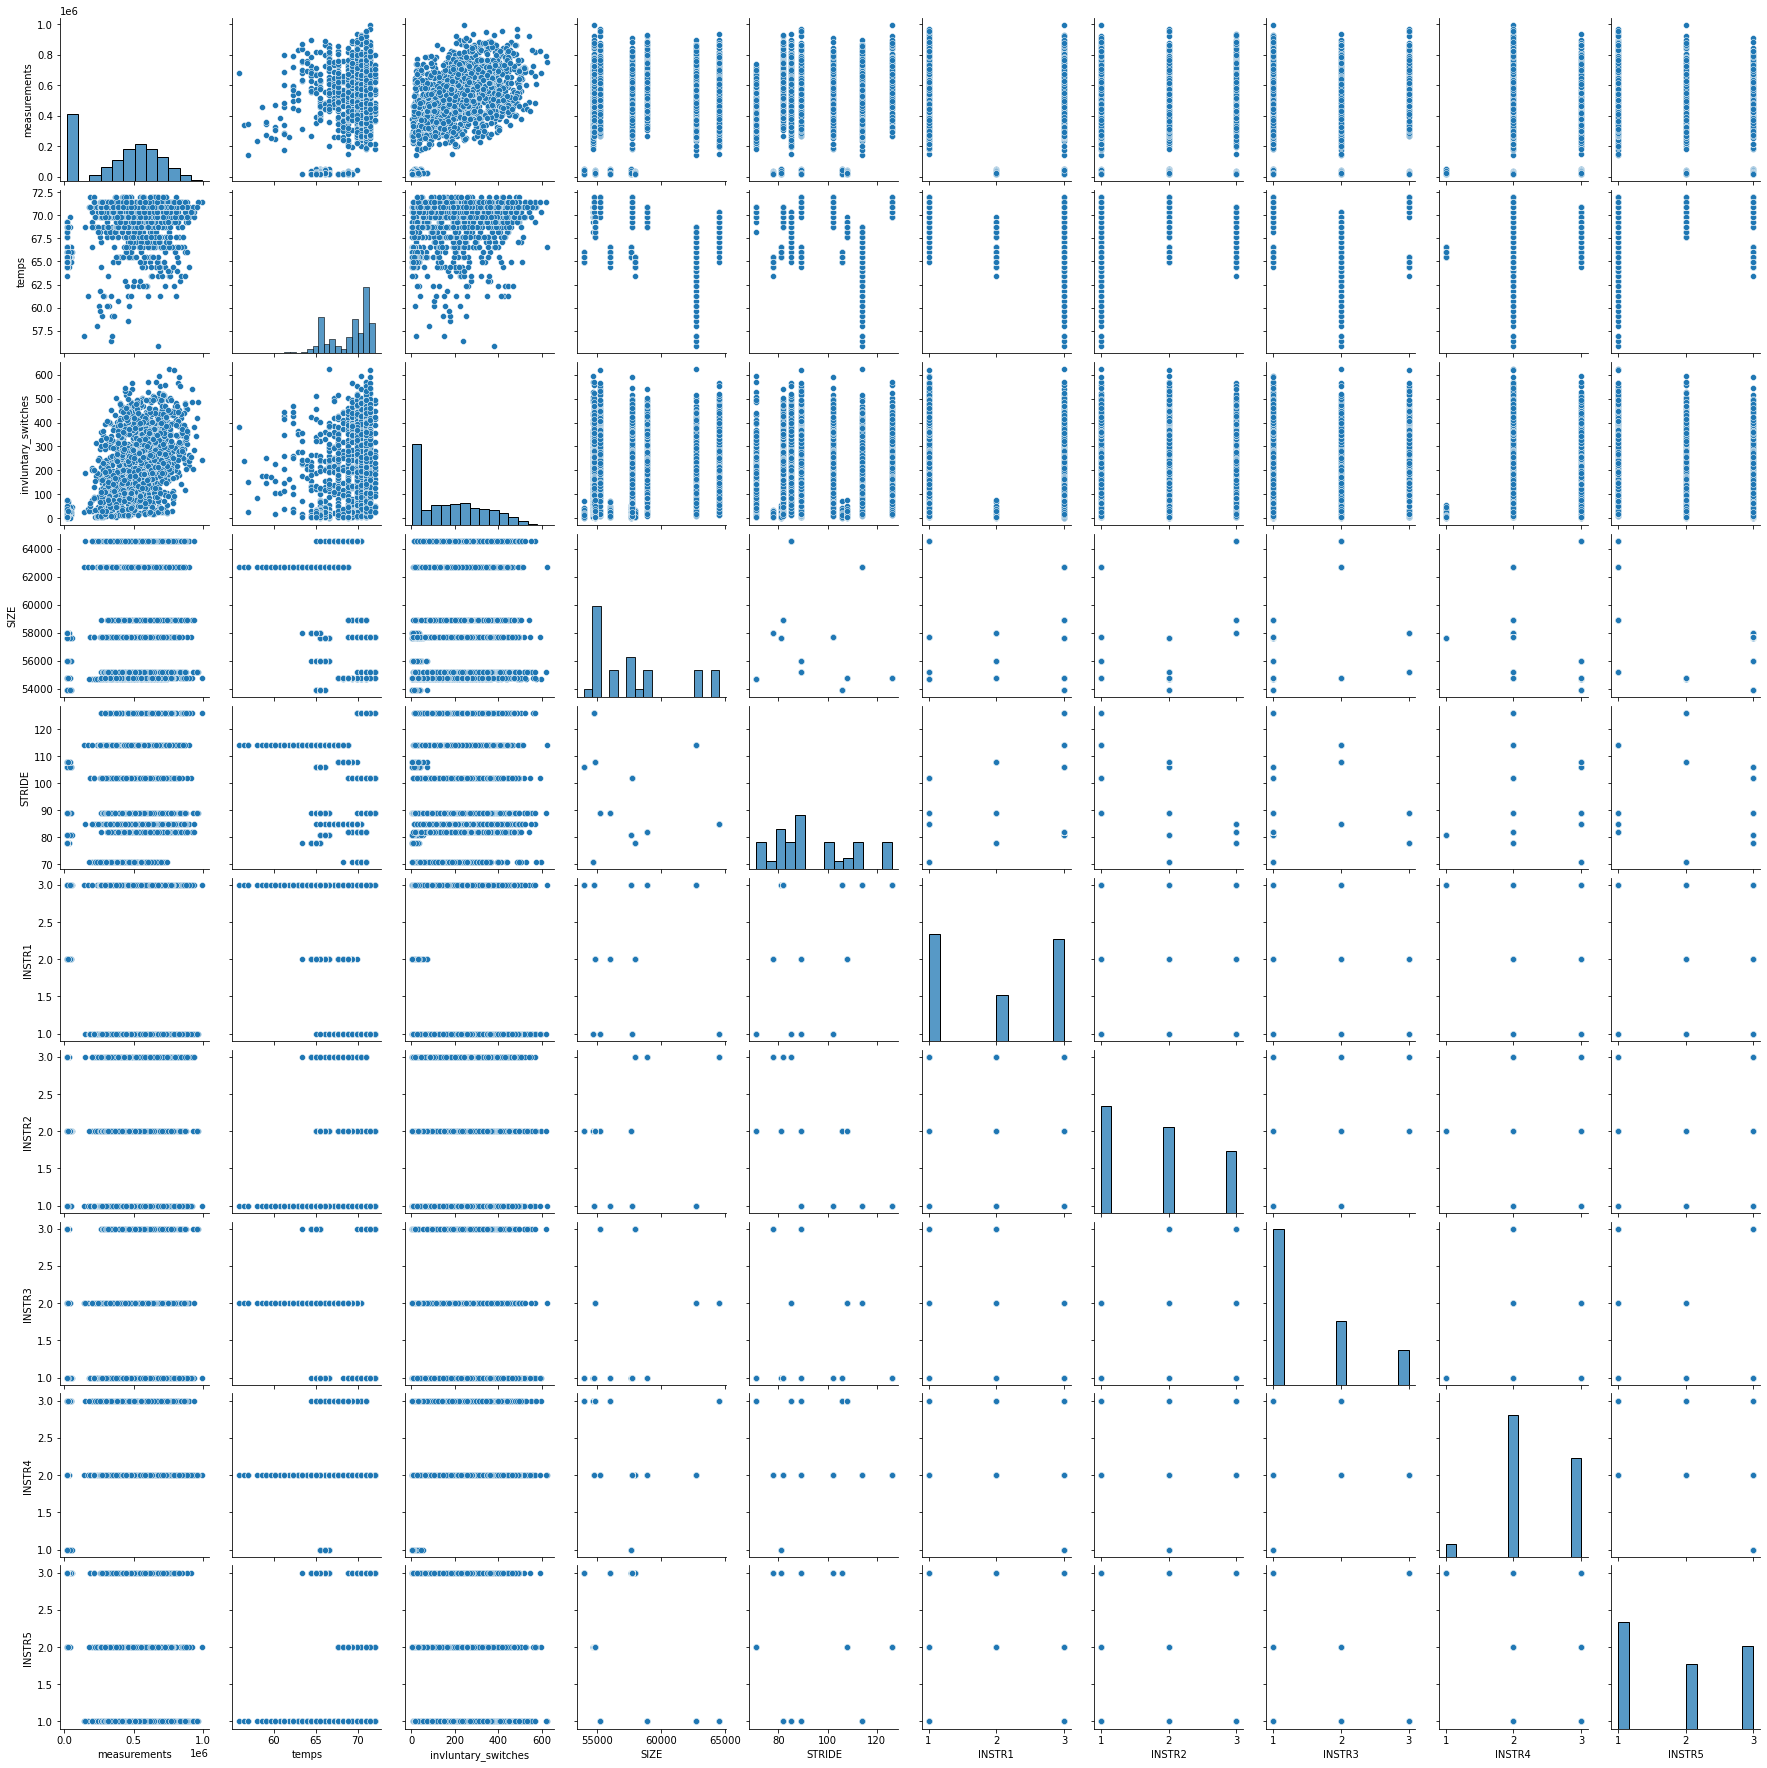

In [28]:
plt.figure(figsize=(20,20)) 
p=sns.pairplot(df)

In [14]:
df['measurements'].divide(1000)

0       150.178
1       115.822
2       115.042
3       112.284
4       120.745
         ...   
1735    115.190
1736    115.002
1737    127.813
1738    118.796
1739    119.908
Name: measurements, Length: 1740, dtype: float64

In [29]:
X = df.drop('measurements', axis=1)
y = df['measurements']

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=0)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


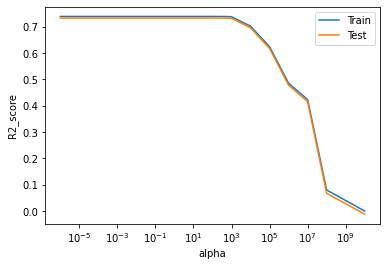

In [31]:
lasso = linear_model.Lasso(tol=0.1)
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 700, 800, 1000, 10000, 100000, 1000000, 1000000, 10000000,
                   100000000, 10000000000,]}
folds=10
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                            cv=folds,
                            return_train_score=True,
                            
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [35]:
alph= 0.001
lasso=linear_model.Lasso(alpha=alph,tol=0.1)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))
coef = lasso.coef_
intercept = lasso.intercept_

print(list(zip(X_train.columns,coef)))
print('intercept= ', intercept)

train R2 score is 0.74
test R2 score is 0.75
[('temps', 18049.15464241355), ('invluntary_switches', 461.5932083201368), ('SIZE', 8.85623097599334), ('STRIDE', 3791.8188967220894), ('INSTR1', -102174.05115074512), ('INSTR2', -27453.47222143666), ('INSTR3', -108240.0198738045), ('INSTR4', -117094.08996334355), ('INSTR5', -176436.91621045364)]
intercept=  -758276.5542421299


model_ols =  linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model_ols, n_features_to_select=1)
sfs.fit(X_train, y_train)

true=sfs.get_support()
list(zip(X.columns,true))


In [21]:
X_train.columns


Index(['temps', 'SIZE_MB', 'SIZE', 'INSTR1', 'INSTR2', 'INSTR3', 'INSTR4',
       'INSTR5', 'cpu-cycles', 'instructions', 'branch-instructions', 'r014',
       'LLC-loads', 'LLC-stores', 'LLC-load-misses', 'LLC-store-misses',
       'bus_access', 'mem_access'],
      dtype='object')

In [32]:
keep = ['invluntary_switches']
X_train_new = X_train[keep]
X_test_new = X_test[keep]
X_train_new.head()

,invluntary_switches
64,18
682,9
960,8
1384,9
1100,12


In [38]:
model_ols =  linear_model.LinearRegression()
model_ols.fit(X_train,y_train)
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)
print(len(coef))
print(list(zip(X_train.columns,coef)))

coef=  [ 1.80491480e+04  4.61593186e+02  8.85622810e+00  3.79181960e+03
 -1.02174078e+05 -2.74534638e+04 -1.08240045e+05 -1.17094112e+05
 -1.76436937e+05]
intercept=  -758275.8240785149
9
[('temps', 18049.14797191716), ('invluntary_switches', 461.5931864876518), ('SIZE', 8.856228100196317), ('STRIDE', 3791.8195996787767), ('INSTR1', -102174.07754076773), ('INSTR2', -27453.463765633078), ('INSTR3', -108240.04463287073), ('INSTR4', -117094.11248838072), ('INSTR5', -176436.93727070047)]


In [39]:
# model evaluation for testing set
R2list=[]
y_predicted = model_ols.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)
R2list.append(r2)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('intercept= ', intercept)
print(list(zip(X_train_new.columns,coef)))

The model performance for testing set
--------------------------------------
MAE is 109573.92339294877
MSE is 18814981888.484512
R2 score is 0.7513928611772104
intercept=  -758275.8240785149


NameError: name 'X_train_new' is not defined

In [40]:
model_ols =  linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model_ols, n_features_to_select=5)
sfs.fit(X_train, y_train)

true=sfs.get_support()
list(zip(X.columns,true))

[('temps', True),
 ('invluntary_switches', True),
 ('SIZE', True),
 ('STRIDE', False),
 ('INSTR1', False),
 ('INSTR2', True),
 ('INSTR3', False),
 ('INSTR4', False),
 ('INSTR5', True)]

In [36]:
keep = ['cpu-cycles', 'invluntary_switches']
X_train_new = X_train[keep]
X_test_new = X_test[keep]
X_train_new.head()

,cpu-cycles,invluntary_switches
64,147467695,18
682,84892885,9
960,73970436,8
1384,87798811,9
1100,84469401,12


In [37]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train_new,y_train)
coef = model_ols.coef_
intercept = model_ols.intercept_


In [38]:
y_predicted = model_ols.predict(X_test_new)
y_predicted = model_ols.predict(X_test_new)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)
R2list.append(r2)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('intercept= ', intercept)
print(list(zip(X_train_new.columns,coef)))

The model performance for testing set
--------------------------------------
MAE is 1407.2800172306406
MSE is 6061316.511309741
R2 score is 0.8873080542751403
intercept=  -8314.421743582056
[('cpu-cycles', 0.0001239205754314815), ('invluntary_switches', 845.2975206584241)]


In [39]:
model_ols =  linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model_ols, n_features_to_select=3)
sfs.fit(X_train, y_train)

true=sfs.get_support()
list(zip(X.columns,true))

[('temps', False),
 ('invluntary_switches', True),
 ('SIZE', False),
 ('STRIDE', False),
 ('INSTR1', False),
 ('INSTR2', False),
 ('INSTR3', False),
 ('INSTR4', False),
 ('INSTR5', False),
 ('cpu-cycles', True),
 ('instructions', False),
 ('branch-instructions', False),
 ('r014', False),
 ('LLC-loads', False),
 ('LLC-stores', False),
 ('LLC-load-misses', False),
 ('LLC-store-misses', False),
 ('bus_access', True),
 ('mem_access', False)]

In [40]:
keep = ['cpu-cycles', 'invluntary_switches', 'bus_access']
X_train_new = X_train[keep]
X_test_new = X_test[keep]

In [41]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train_new,y_train)
coef = model_ols.coef_
intercept = model_ols.intercept_



In [42]:
y_predicted = model_ols.predict(X_test_new)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)
R2list.append(r2)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('intercept= ', intercept)
print(list(zip(X_train_new.columns,coef)))

The model performance for testing set
--------------------------------------
MAE is 1095.9911846353054
MSE is 4722683.827056826
R2 score is 0.9121959019098708
intercept=  -9628.39554179122
[('cpu-cycles', 0.0002222700728847368), ('invluntary_switches', 781.4692865643543), ('bus_access', -0.0011927361787734422)]


In [44]:
model_ols =  linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model_ols, n_features_to_select=4)
sfs.fit(X_train, y_train)

true=sfs.get_support()
list(zip(X.columns,true))

[('temps', False),
 ('invluntary_switches', True),
 ('SIZE', False),
 ('STRIDE', False),
 ('INSTR1', False),
 ('INSTR2', False),
 ('INSTR3', False),
 ('INSTR4', False),
 ('INSTR5', False),
 ('cpu-cycles', True),
 ('instructions', False),
 ('branch-instructions', False),
 ('r014', False),
 ('LLC-loads', False),
 ('LLC-stores', True),
 ('LLC-load-misses', False),
 ('LLC-store-misses', False),
 ('bus_access', True),
 ('mem_access', False)]

In [45]:
keep = ['cpu-cycles', 'invluntary_switches', 'bus_access', 'LLC-stores']
X_train_new = X_train[keep]
X_test_new = X_test[keep]

In [46]:
X_train_new = X_train[keep]
X_test_new = X_test[keep]
model_ols =  linear_model.LinearRegression()
model_ols.fit(X_train_new,y_train)
coef = model_ols.coef_
intercept = model_ols.intercept_
y_predicted = model_ols.predict(X_test_new)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)
R2list.append(r2)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('intercept= ', intercept)
print(list(zip(X_train_new.columns,coef)))

The model performance for testing set
--------------------------------------
MAE is 1006.3866866374836
MSE is 4572188.24932659
R2 score is 0.9149939144283991
intercept=  -9237.879605830864
[('cpu-cycles', 0.0002452243833876273), ('invluntary_switches', 809.510829054006), ('bus_access', -0.0007534118537200374), ('LLC-stores', -0.0054484044065015265)]


In [47]:
model_ols =  linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model_ols, n_features_to_select=5)
sfs.fit(X_train, y_train)

true=sfs.get_support()
list(zip(X.columns,true))

[('temps', False),
 ('invluntary_switches', True),
 ('SIZE', False),
 ('STRIDE', False),
 ('INSTR1', False),
 ('INSTR2', False),
 ('INSTR3', False),
 ('INSTR4', False),
 ('INSTR5', False),
 ('cpu-cycles', True),
 ('instructions', False),
 ('branch-instructions', False),
 ('r014', False),
 ('LLC-loads', True),
 ('LLC-stores', True),
 ('LLC-load-misses', False),
 ('LLC-store-misses', False),
 ('bus_access', True),
 ('mem_access', False)]

In [48]:
keep = ['cpu-cycles', 'invluntary_switches', 'bus_access', 'LLC-stores', 'LLC-loads']
X_train_new = X_train[keep]
X_test_new = X_test[keep]

In [49]:

model_ols =  linear_model.LinearRegression()
model_ols.fit(X_train_new,y_train)
coef = model_ols.coef_
intercept = model_ols.intercept_
y_predicted = model_ols.predict(X_test_new)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)
R2list.append(r2)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('intercept= ', intercept)
print(list(zip(X_train_new.columns,coef)))

The model performance for testing set
--------------------------------------
MAE is 843.5698141999302
MSE is 4171822.4094457333
R2 score is 0.9224375127644628
intercept=  -9490.478888911644
[('cpu-cycles', 0.00021478630245320843), ('invluntary_switches', 765.523255943808), ('bus_access', -0.0008639625273283863), ('LLC-stores', -0.004487671239887744), ('LLC-loads', 0.0016423614292852358)]


In [52]:
model_ols =  linear_model.LinearRegression()
sfs = SequentialFeatureSelector(model_ols, n_features_to_select=14)
sfs.fit(X_train, y_train)

true=sfs.get_support()
list(zip(X.columns,true))

[('temps', True),
 ('invluntary_switches', True),
 ('SIZE', False),
 ('STRIDE', False),
 ('INSTR1', True),
 ('INSTR2', True),
 ('INSTR3', True),
 ('INSTR4', True),
 ('INSTR5', False),
 ('cpu-cycles', True),
 ('instructions', True),
 ('branch-instructions', True),
 ('r014', True),
 ('LLC-loads', True),
 ('LLC-stores', True),
 ('LLC-load-misses', False),
 ('LLC-store-misses', False),
 ('bus_access', True),
 ('mem_access', True)]

In [56]:
keep = ['STRIDE','SIZE','temps','cpu-cycles', 'invluntary_switches', 'bus_access', 'LLC-stores', 'LLC-loads','instructions','branch-instructions','r014',]
X_train_new = X_train[keep]
X_test_new = X_test[keep]
model_ols =  linear_model.LinearRegression()
model_ols.fit(X_train_new,y_train)
coef = model_ols.coef_
intercept = model_ols.intercept_
y_predicted = model_ols.predict(X_test_new)
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)
R2list.append(r2)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('intercept= ', intercept)
print(list(zip(X_train_new.columns,coef)))

The model performance for testing set
--------------------------------------
MAE is 707.540995852292
MSE is 3520996.193922989
R2 score is 0.9345376683031409
intercept=  -11813.998682992305
[('STRIDE', 2.845894104584724), ('SIZE', 0.003667666054074117), ('temps', 37.51674312356327), ('cpu-cycles', 0.0002074775557024164), ('invluntary_switches', 669.6566308705886), ('bus_access', -0.000860873851548762), ('LLC-stores', -0.0025969339090495054), ('LLC-loads', 0.0017784164283298958), ('instructions', 7.000432332749769e-05), ('branch-instructions', -0.0005147167230317121), ('r014', -6.711432240085389e-05)]
